# The $1/v$ nature of cross sections on log-log plots

The question was posed during discussion why $1/v$ absorbers have cross section spectra with a slope of 1/2 at lower energies. The argument was that $1/v$ is a nonlinear function, so it shouldn't have a constant slope. 

The answer to this question is that cross section plots are displayed in log-log scale, and in terms of energy. 

First, since cross sections are measured from low energies (meV) to very high energies (GeV), and have cross sections ranging across orders of magnitude (mb to Mb), it would be impossible to display their behavior across this entire range without using logarithmic scales. Here is an example of a cross section plot for $^{235}$U with and withoout log-scale axes. (The code to generate these plots is below.)

<img src="U235_fission-xs_linlin.png" alt='U235 fission cross sections on linear axes' width='400'>
<img src="U235_fission-xs_loglog.png" alt='U235 fission cross sections on logarithmic axes' width='400'>

As you can see, the plot with linear axes is dominated by the high energy data on the bottom, and high cross section data on the left side.

Second, cross sections are plotted in terms of neutron energy, not velocity. Let's look at what happens when we plot the function $\sigma(v) = \frac{1}{v}$ along with the analagous $\sigma(E) = \frac{1}{\sqrt{E}} \propto \frac{1}{v}$.

<img src="sigmav-sigmaE.png" alt='Plot of 1/v and 1/sqrt(E)' width='400'>

Finally, we take our plot of $\sigma(E) = \frac{1}{\sqrt{E}}$ and plot it on a logarithmic scale. If both axes are logarithmic, we can imagine that we are taking the logarithm of both sides.
$$ \ln\left(\sigma(E)\right) = \ln\left(\frac{1}{\sqrt{E}}\right) = \ln\left(E^{-1/2}\right) = -\frac{1}{2}\ln(E)$$
Where before our $y$- and $x$-axes were $\sigma(E)$ and $E$, now our $y$-axis is $\ln(\sigma(E))$, and our $x$-axis is $\ln(E)$. The slope is then obviously $-1/2$. We confirm this by looking at the plot.

<img src="sigmaE_loglog.png" alt='Plot of 1/sqrt(E) on a log scale' width='400'>


## Code for generating the graphics we've shown

In [1]:
# Overhead for data processing and plotting
import numpy as np
from matplotlib import pyplot as plt

We have a saved copy of the $^{235}$U fission cross section data from ENDF. Let's load this dataset.

In [2]:
def read_endf(filename):
    data = np.genfromtxt(filename,skip_header=8,skip_footer=2,usecols=[0,1])
    return data

In [3]:
endf_U235_fission = read_endf('ENDF_U235_fission-xs.txt')
E,sigma = endf_U235_fission[:,0],endf_U235_fission[:,1]

### Linear axes vs. logarithmic axes

First, we write a function to plot cross sections. The function takes in a set of energies, a set of cross sections, and a plotting mode (lin-lin, log-lin, log-log, etc.).

In [4]:
def plot_xs(E,sigma,mode):
    '''
    A function to plot cross sections. 
    
    The function takes in a set of energies, a set of cross sections, 
    and a plotting mode (lin-lin, log-lin, log-log, etc.)
    '''
    fig,ax = plt.subplots(figsize=(8,5))
    if mode == 'lin-lin':
        ax.plot(E,sigma)
    elif mode == 'log-lin':
        ax.semilogy(E,sigma)
    elif mode == 'lin-log':
        ax.semilogx(E,sigma)
    elif mode == 'log-log':
        ax.loglog(E,sigma)
    ax.set_title('Cross sections, plotted on a {} scale'.format(mode),fontsize=16)
    ax.set_xlabel('Energy [eV]',fontsize=16,labelpad=10)
    ax.set_ylabel('$\sigma$ [b]',fontsize=16,rotation=0,labelpad=30)
    return

Now we plot our data on a set of linear axes.

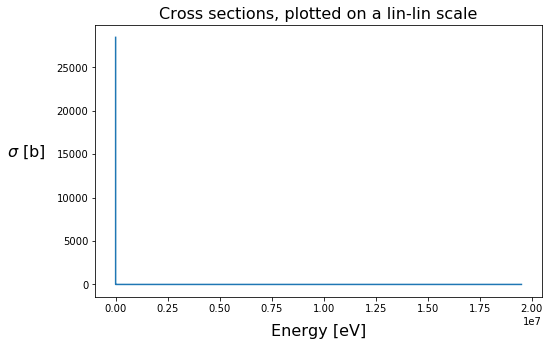

In [5]:
u235linax = plot_xs(E,sigma,'lin-lin')
plt.savefig('U235_fission-xs_linlin.png')
plt.show()

This plot is not particularly insightful. Next, we plot our data on a set of logarithmic axes.

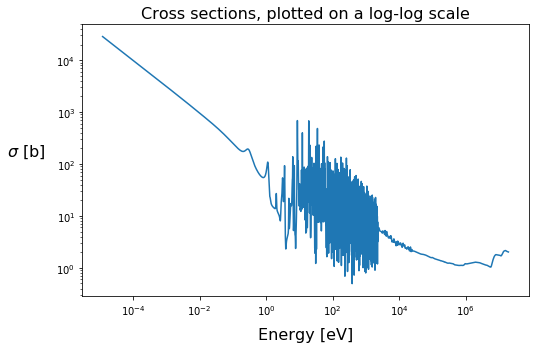

In [6]:
u235logax = plot_xs(E,sigma,'log-log')
plt.savefig('U235_fission-xs_loglog.png')
plt.show()

This is much more interesting, and we can see the resonances far more clearly than in the first plot.

### $1/v$ on linear axes, with independent variables $v$ and $E$

Cross sections are plotted by energy. A plot of data following a 1/v trend will vary depending on the parameter used.

Below, we plot the functions $\sigma(v) = \frac{1}{v}$ and $\sigma(E) = \frac{1}{\sqrt{E}} \propto \frac{1}{v}$.

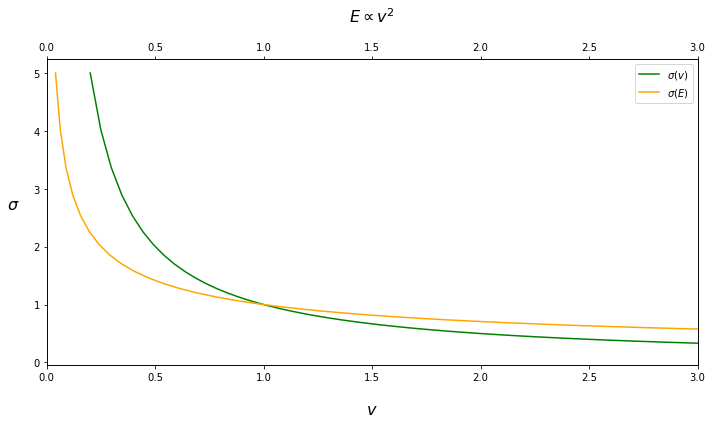

In [7]:
v = np.linspace(0.2,5,100)
E = v**2
sigma = 1/v
fig, ax_v = plt.subplots(figsize=(10,6))
vline, = ax_v.plot(v,sigma,'green',label='$\sigma(v)$')
ax_v.set_xlim(0,3)
ax_v.set_xlabel('$v$',fontsize=16,labelpad=20)
ax_v.set_ylabel('$\sigma$',fontsize=16,rotation=0,labelpad=20)

ax_E = ax_v.twiny()
Eline, = ax_E.plot(E,sigma,'orange',label='$\sigma(E)$')
ax_E.set_xlim(0,3)
ax_E.set_xlabel('$E \propto v^2$',fontsize=16,labelpad=20)

lines = [vline,Eline]
labels = [l.get_label() for l in lines]
plt.legend(lines,labels)
plt.tight_layout()
plt.savefig('sigmav-sigmaE.png')
plt.show()

We have plotted both functions on the same plot here to illustrate their differences.

### Plotting $\sigma(E) = \frac{1}{\sqrt{E}}$ on a log-log scale

We take our plot from above and change the axes to log scale. Setting the $E$-axis to cover two orders of magnitude for every order of magnitude in the $\sigma$-axis, the slope on the log-log plot is $-1/2$. 

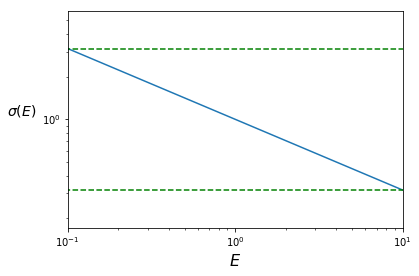

In [27]:
fig,ax_logE = plt.subplots()
ax_logE.loglog(E,sigma)
ax_logE.loglog(E,3.15*np.ones(len(E)),'g--')
ax_logE.loglog(E,0.315*np.ones(len(E)),'g--')
ax_logE.set_xlim(1e-1,10)
ax_logE.set_xlabel('$E$',fontsize=16)
ax_logE.set_ylabel('$\sigma(E)$',fontsize=14,rotation=0,labelpad=20)
plt.savefig('sigmaE_loglog.png')
plt.show()

The dashed lines show one order of magnitude difference on the y-axis.